In [ ]:
#if need to delete all variable
%reset

In [1]:
%pylab inline
import skimage.io as sk
import imageio
import ipywidgets as wdg
import skan
from pathlib import Path
import pandas as pd


In /home/rishabhstein/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rishabhstein/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rishabhstein/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rishabhstein/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rishabhstein/anaconda3/lib/

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = Path('/mnt/7149C4F67F3305B7/Rishabh/Tomography_Data/PZ103/Subtractions/')
fsuffix = 'PZ103_01-33.tif' #It can be a list in Path folder


file = Path(path.resolve(), fsuffix)
full_img = sk.imread(str(file), as_gray=False)

In [3]:
print(np.shape(full_img))
img = full_img[126:824]
print(np.shape(img))


(959, 251, 251)
(698, 251, 251)


### Choosing a point of wormhole to extract it from grayscale difference image

In [4]:
z = 400

In [5]:
%matplotlib tk
fig = figure(figsize=(7,7))

imshow(img[z], cmap="gray")
x = 0; y = 0

def onclick(event):
    global x
    global y
    close()
    x = int((event.xdata))
    y = int((event.ydata))
    print(x,y)

ka = fig.canvas.mpl_connect('button_press_event', onclick)


167 168


In [6]:
fig.canvas.mpl_disconnect(ka)
point = [z, x, y]

In [ ]:
### To use mavayi give point manually
x = 167; y = 168;
point = [z, x, y]

### For testing the range of threshold values

In [29]:
grayselected = img[z, y, x]
graythresh = 545
mask = img >= graythresh

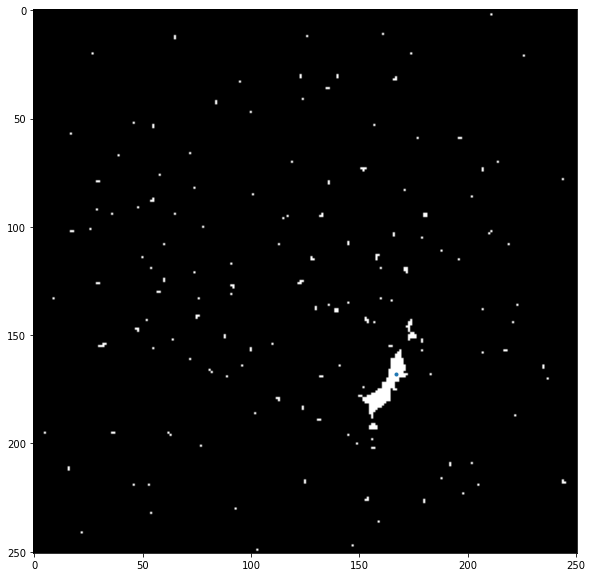

In [30]:
%matplotlib inline
fig = figure(figsize=(10,10))
imshow(mask[z], cmap="gray")
plot(x, y, ".")
show()

In [31]:
import time
from skimage import measure, morphology, segmentation
import scipy.ndimage.morphology as morph 


start =time.time()
whmask = segmentation.flood(mask, (z, y, x), connectivity=1)
filled_wormhole = morph.binary_fill_holes(whmask)
end =time.time()
print(end-start)

1.9604520797729492


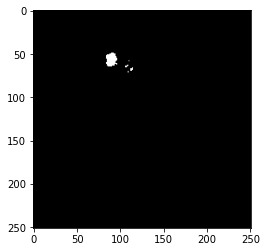

In [32]:
imshow(filled_wormhole[50], cmap="gray")
show()

In [33]:
vox_vol = filled_wormhole.sum()
vox_size = 169
print("Wormhole volume: " + str(vox_vol*(1*vox_size)**3/1000**3/10**3) + " cm3 ") # Volume in cm^3
#print(11.5*pi*(3.83/2)**2) # Volume of sample
print(vox_vol) # Volume of scan

Wormhole volume: 0.693742777143 cm3 
143727


## Extraction of Wormhole

In [43]:
import sys
sys.path.append('../')
import lib.Geometric_properties_of_wormhole as GPM

#Reload modules
import importlib
importlib.reload(GPM)

<module 'lib.Geometric_properties_of_wormhole' from '../lib/Geometric_properties_of_wormhole.py'>

In [44]:
th_value = 545
# Finding the wormhole

sample = GPM.Wormhole_from_tomography(img, suffix = fsuffix, voxel_size = 169, downscaling_factor=1)


Vol_unfill, wormhole_unfilled = sample.Connected_components_extraction(th_value=th_value, point=point)

#Filling the holes and calculatin volume
Vol_fill, wormhole_filled = sample.Fill_holes_in_wormhole()


#Calculating Surface area and Volume in voxels as well as cm scale
SA = sample.Surface_area_Legland_et_al()
Vol_cm, SA_cm = sample.Volume_and_Surface_area_Cm2()


In [40]:
#Save tiff file
sample.Save_extracted_wormhole()

In [45]:
sample.Skeletonise_the_wormhole(outlet_node = 4587)
sample.info

Finding dominant wormhole

 Node-4587, provided by user is connected and chosen outlet node
Cordinates of the outlet node is[473.  85. 120.]
%=====================Looking for Inlet node=========================%

Node-0is not connected to main wormhole
Node-1 is connected and chosen as source node
Cordinates of the inlet node is [  0.  43. 125.]
%=====================Looking for Outlet node=========================%



{'File_name': 'PZ103_01-33.tif',
 'voxel_size': 169,
 'downscaling_factor': 1,
 'Volume_in_voxel': 143727,
 'Volume in cm3': 0.693742777143,
 'Surface_area_in_voxel': 98705.47716861086,
 'Surface_area_in_cm2': 0.2819127133412695,
 'Length_of_wormhole': 1069.2324733243302,
 'Length_of_wormhole_cm': 18.07002879918118,
 'Tortuosity': 2.2605337702417128,
 'Wastefullness': 13.16236275918296}

In [46]:
import csv

mydict = sample.info

with open('dict.csv', 'a') as csv_file:  
    writer = csv.writer(csv_file)
    #writer.writerow([k for k in mydict.keys()])
    writer.writerow([v for v in mydict.values()])